<a href="https://colab.research.google.com/github/ththtec/Grupo7_ProjetoFinal/blob/main/An%C3%A1lise_Demogr%C3%A1fica_(Perfil_do_Foli%C3%A3o).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Demográfica (Perfil do Folião)

Para iniciarmos essa analise, definimos um passo-a-passo:

1- Importar Bibliotecas

2 - Carregar df

3 - Separar as categorias

4 - Iniciar a ingestão de dados e querys

5- Iniciar a Visualização de dados

6 - Gerar insights


In [62]:
# Importando as bibliotecas essenciais para nossa análise
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify # Importando a biblioteca squarify

In [2]:
# Configurações para melhorar a visualização dos gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 12

In [4]:
# Carregando os dados do arquivo CSV para um DataFrame do pandas
from google.colab import files
uploaded = files.upload()

Saving tabelafinal.csv to tabelafinal.csv


In [9]:


df = pd.read_csv('tabelafinal.csv')
print("Arquivo CSV carregado com sucesso!")

Arquivo CSV carregado com sucesso!


##1: Análise Demográfica

Vamos analisar as colunas genero, escolaridade, estadocivil e renda para entender quem é o público do carnaval.

Resultado: Tabelas de frequência e porcentagem para cada uma dessas categorias.


####1. Gênero

In [10]:

print("\n--- 1. Distribuição por Gênero ---")
# Usamos value_counts() para contar as ocorrências de cada gênero.
# O parâmetro normalize=True já nos dá o resultado em porcentagem.
tabela_genero = df['genero'].value_counts(normalize=True).mul(100).round(2).reset_index()
tabela_genero.columns = ['Gênero', 'Porcentagem (%)']
display(tabela_genero)


--- 1. Distribuição por Gênero ---


,Gênero,Porcentagem (%)
0,Feminino,52.37
1,Masculino,47.01
2,Outros,0.63


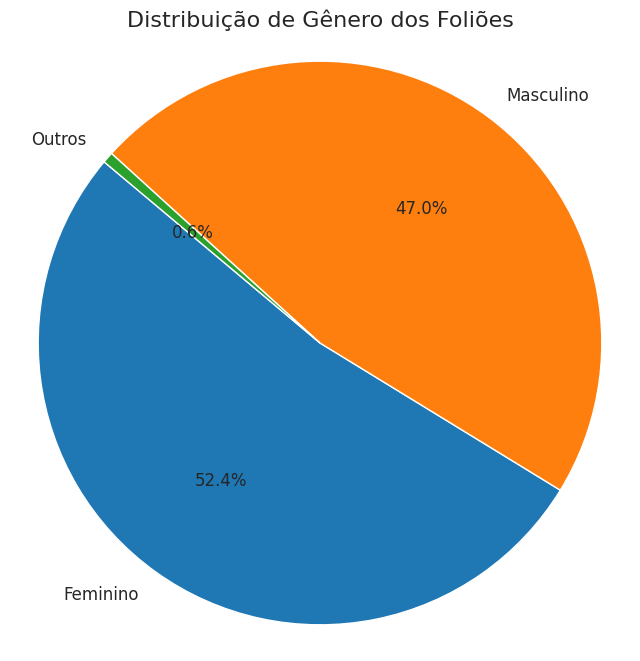

In [17]:
# Gráfico de Pizza da Distribuição de Gênero
plt.figure(figsize=(8, 8))
plt.pie(
    tabela_genero['Porcentagem (%)'],
    labels=tabela_genero['Gênero'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('tab10', len(tabela_genero))
)
plt.title('Distribuição de Gênero dos Foliões', fontsize=16)
plt.axis('equal')  # Garante que o gráfico seja um círculo
plt.show()


###2. Escolaridade


In [18]:

print("\n--- 2. Distribuição por Escolaridade ---")
tabela_escolaridade = df['escolaridade'].value_counts(normalize=True).mul(100).round(2).reset_index()
tabela_escolaridade.columns = ['Escolaridade', 'Porcentagem (%)']
display(tabela_escolaridade)


--- 2. Distribuição por Escolaridade ---


,Escolaridade,Porcentagem (%)
0,Ensino Superior completo,44.24
1,Ensino Medio completo,30.12
2,Posgraduacao/ Mestrado/ Doutorado completo,15.37
3,Ensino Tecnico completo,7.33
4,Ensino Fundamental completo,2.50
5,Sem instrucao formal,0.45


/tmp/ipython-input-2790617600.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Porcentagem (%)', y='Escolaridade', data=tabela_escolaridade, orient='h', palette='plasma')


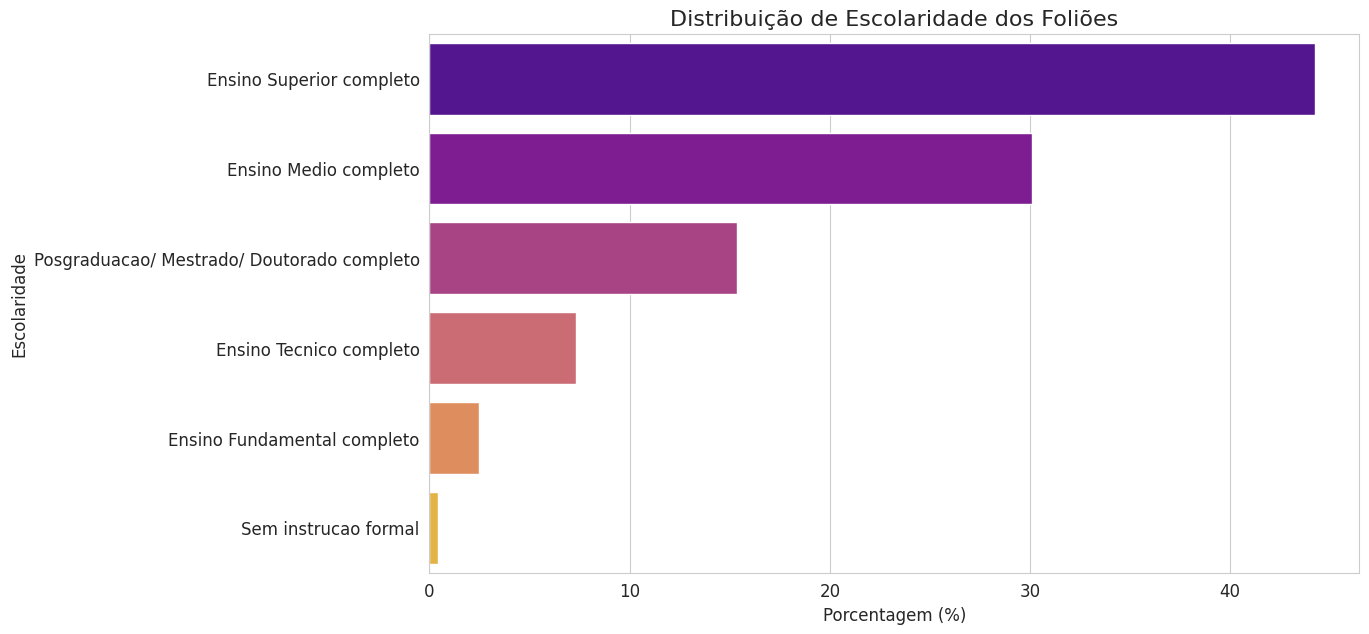

In [19]:
#Grafico de barras laterais
plt.figure(figsize=(12, 7))
sns.barplot(x='Porcentagem (%)', y='Escolaridade', data=tabela_escolaridade, orient='h', palette='plasma')
plt.title('Distribuição de Escolaridade dos Foliões', fontsize=16)
plt.xlabel('Porcentagem (%)', fontsize=12)
plt.ylabel('Escolaridade', fontsize=12)
plt.show()

###3. Renda Familiar

In [32]:
print("\n--- 3. Distribuição por Renda Familiar ---")
# Ordenar as faixas de renda para melhor visualização no gráfico
ordem_renda = [
    'Nao possui renda',
    'Ate 1 SM (R$1.30200)',
    'Entre 1 SM e 3 SM (R$1.30201 a R$3.90600)',
    'Entre 3 SM e 5 SM (R$3.906 01 a R$6.51000)',
    'Entre 5 SM e 7 SM (R$6.51001 a R$ 9.11400)',
    'Entre 7 SM e 10 SM (R$9.11401 a R$13.02000)',
    'Acima de 10 SM (R$13.02001 ou mais)',
    'NR NS'
    ]

tabela_renda = df['renda'].value_counts(normalize=True).mul(100).reindex(ordem_renda).round(2).reset_index()
tabela_renda.columns = ['Renda', 'Porcentagem (%)']
display(tabela_renda)


--- 3. Distribuição por Renda Familiar ---


,Renda,Porcentagem (%)
0,Nao possui renda,0.71
1,Ate 1 SM (R$1.30200),NaN
2,Entre 1 SM e 3 SM (R$1.30201 a R$3.90600),NaN
3,Entre 3 SM e 5 SM (R$3.906 01 a R$6.51000),29.49
4,Entre 5 SM e 7 SM (R$6.51001 a R$ 9.11400),14.48
5,Entre 7 SM e 10 SM (R$9.11401 a R$13.02000),11.80
6,Acima de 10 SM (R$13.02001 ou mais),NaN
7,NR NS,NaN


In [ ]:
##Grafico de funil

## 2: Análise de Origem (Moradores vs. Visitantes)

O que faremos: Calcularemos a quantidade e a porcentagem exata de foliões que são moradores de BH/RMBH versus aqueles que são visitantes/turistas.

Resultado: Uma tabela simples com a contagem e o percentual de cada grupo.

In [34]:
print("--- 2. Proporção: Moradores vs. Visitantes ---")

# Contagem e cálculo da porcentagem
tabela_origem = df['morador'].value_counts().reset_index()
tabela_origem.columns = ['Público', 'Contagem']
tabela_origem['Porcentagem (%)'] = (df['morador'].value_counts(normalize=True) * 100).round(2).values

display(tabela_origem)

--- 2. Proporção: Moradores vs. Visitantes ---


,Público,Contagem,Porcentagem (%)
0,Morador,950,84.9
1,Visitante,169,15.1


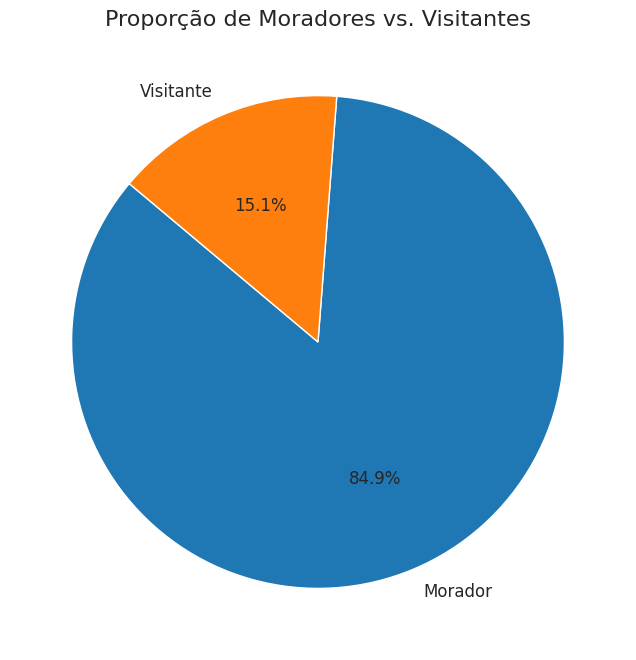

In [36]:
# Sugestão de Gráfico (Pizza)
plt.figure(figsize=(8, 8))
plt.pie(tabela_origem['Contagem'],
        labels=tabela_origem['Público'],
        autopct='%.1f%%',
        startangle=140,
        colors=sns.color_palette('tab10', len(tabela_origem)))
plt.title('Proporção de Moradores vs. Visitantes', fontsize=16)
plt.ylabel('') # Remove o label 'Público' do eixo y
plt.show()

##3: Popularidade dos Blocos

O que faremos: Vamos contar quantas pessoas foram entrevistadas em cada bloquinho para criar um ranking de popularidade (com base na amostra da pesquisa).

Resultado: Uma tabela ordenada mostrando os blocos com mais e menos foliões entrevistados.


In [47]:
print("--- 3. Popularidade dos Blocos ---")

# Contar a frequência de cada bloquinho e obter os top 15
bloquinhos_populares = df['bloquinho'].value_counts().reset_index()
bloquinhos_populares.columns = ['Bloquinho', 'Contagem']

top_15_blocos = bloquinhos_populares.head(15)
display(top_15_blocos)

--- 3. Popularidade dos Blocos ---


,Bloquinho,Contagem
0,ENTAO BRILHA!,92
1,QUANDO COME SE LAMBUZA,92
2,BLOCO DA CALIXTO,92
3,FUNK YOU,92
4,BAIANAS OZADAS,91
5,BLOCO ANGOLA JANGA,79
6,HAVAYANAS USADAS,64
7,BATUQUE COLETIVO,63
8,BEICO DO WANDO,62
9,BAIANEIROS,60


In [59]:
# Gerar rótulos para um possível gráfico (usando os top 15 blocos)
labels = [f"{nome}\n({contagem})" for nome, contagem in zip(top_15_blocos['Bloquinho'], top_15_blocos['Contagem'])]

print("Top 15 blocos:")
print(labels)

Rótulos gerados para os top 15 blocos:
['ENTAO BRILHA!\n(92)', 'QUANDO COME SE LAMBUZA\n(92)', 'BLOCO DA CALIXTO\n(92)', 'FUNK YOU\n(92)', 'BAIANAS OZADAS\n(91)', 'BLOCO ANGOLA JANGA\n(79)', 'HAVAYANAS USADAS\n(64)', 'BATUQUE COLETIVO\n(63)', 'BEICO DO WANDO\n(62)', 'BAIANEIROS\n(60)', 'TCHANZINHO ZONA NORTE\n(43)', 'VOLTA BELCHIOR\n(37)', 'ABALOCAXI\n(37)', 'GAROTAS SOLTEIRAS\n(36)', 'JUVENTUDE BRONZEADA\n(34)']


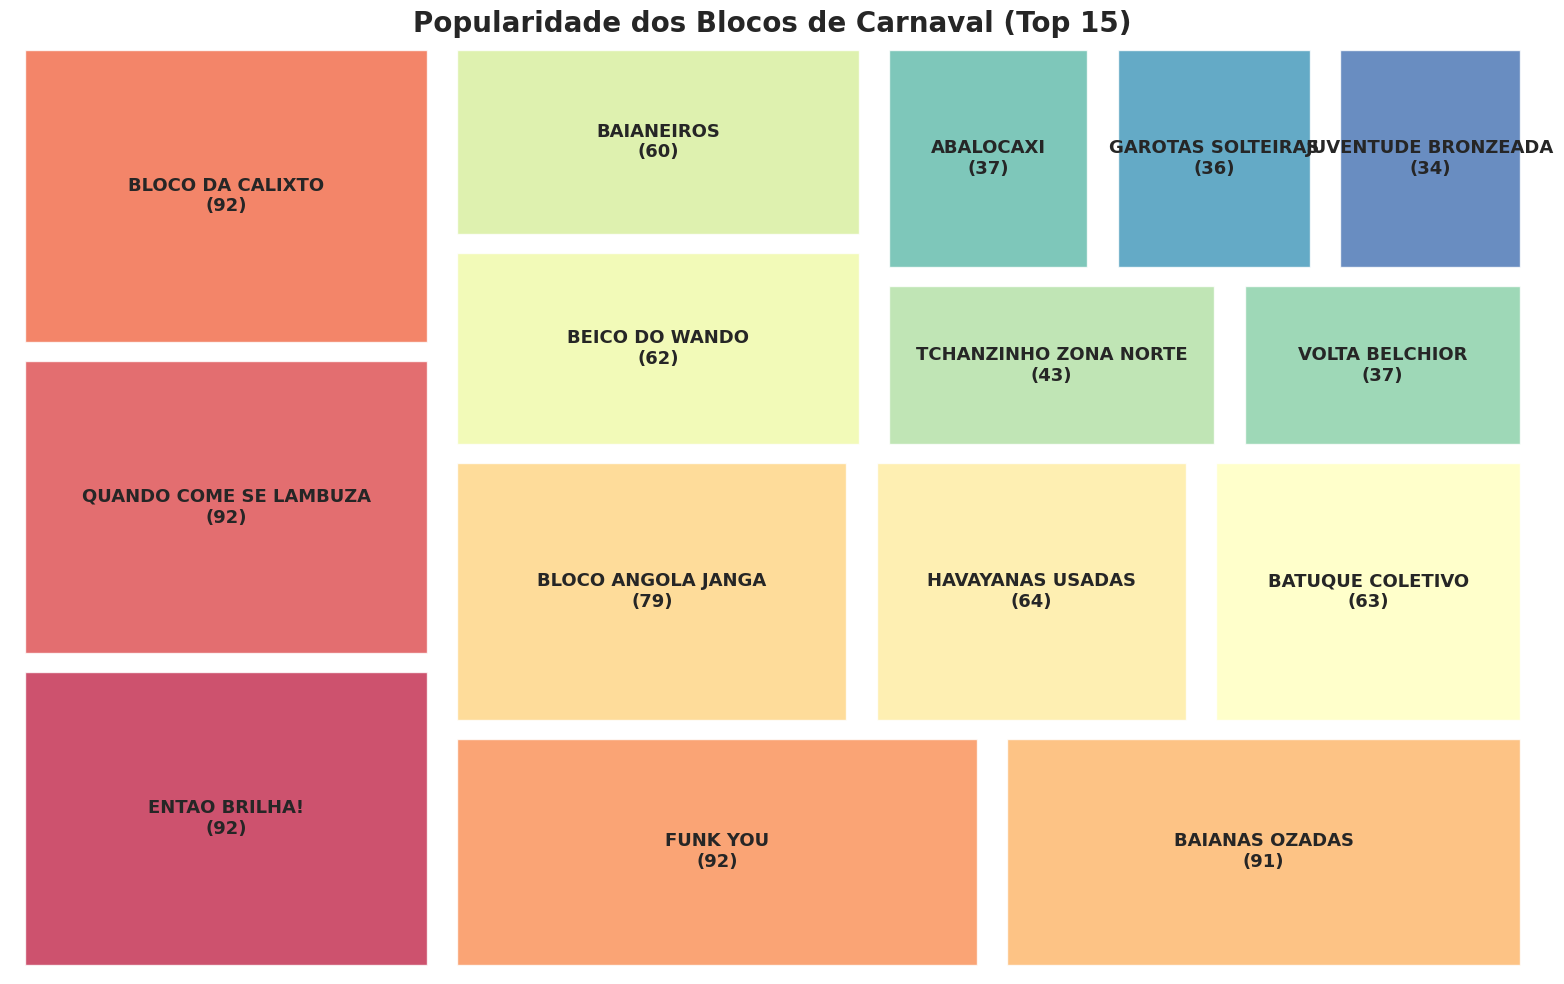

In [80]:
# Dados
sizes = top_15_blocos['Contagem']
labels = [f"{nome}\n({contagem})" for nome, contagem in zip(top_15_blocos['Bloquinho'], top_15_blocos['Contagem'])]

# Cores vibrantes
colors = sns.color_palette('Spectral', len(sizes))

# Treemap estilizado
plt.figure(figsize=(16, 10))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=colors,
    alpha=0.8,
    pad=2,
    text_kwargs={'fontsize': 13, 'weight': 'bold'},
    edgecolor='white',
    linewidth= 1
)

# Título e layout
plt.title('Popularidade dos Blocos de Carnaval (Top 15)', fontsize=20, weight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

##4: Análise de Inclusão (Comunidade LGBTQIA+)

O que faremos: Analisaremos as colunas apoioLGBTQIA (percepção de apoio) e fazparteLGBTQIA (autodeclaração) para medir a inclusão no evento.

Resultado: Tabelas de frequência e porcentagem mostrando a percepção de apoio e a representatividade da comunidade.

###1. Apoio a Comunidade

In [49]:
print("\n---. Você apoia a comunidade LGBTQIA+? ---")
tabela_apoio = df['apoioLGBTQIA'].value_counts(normalize=True).mul(100).round(2).reset_index()
tabela_apoio.columns = ['Resposta', 'Porcentagem (%)']
display(tabela_apoio)


---. Você apoia a comunidade LGBTQIA+? ---


,Resposta,Porcentagem (%)
0,Sim,96.43
1,NS/NR,1.97
2,Nao,1.61


/tmp/ipython-input-2514539745.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




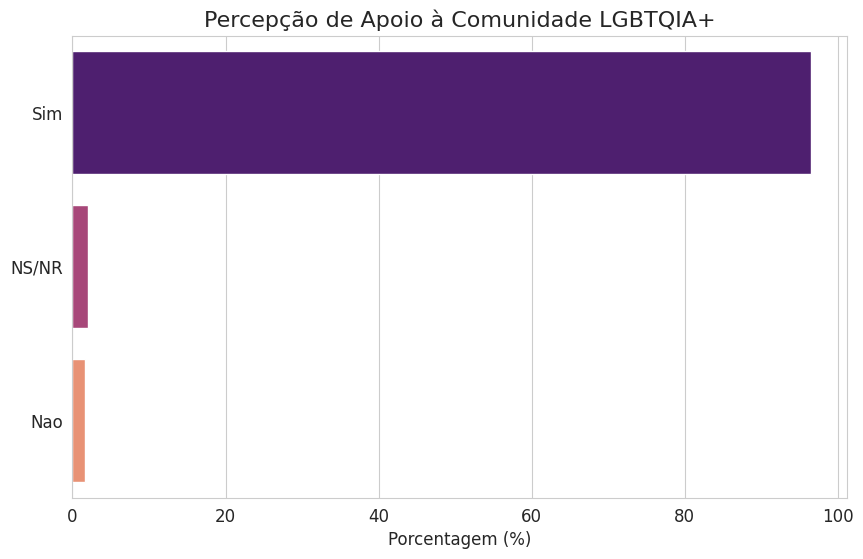

In [50]:
# Gráfico para a percepção de apoio
plt.figure(figsize=(10, 6))
sns.barplot(x='Porcentagem (%)', y='Resposta', data=tabela_apoio, orient='h', palette='magma')
plt.title('Percepção de Apoio à Comunidade LGBTQIA+', fontsize=16)
plt.xlabel('Porcentagem (%)')
plt.ylabel('')
plt.show()

###2. Autodeclaração

In [51]:
print("\n--- Você se considera parte da comunidade LGBTQIA+? ---")
tabela_fazparte = df['fazparteLGBTQIA'].value_counts(normalize=True).mul(100).round(2).reset_index()
tabela_fazparte.columns = ['Resposta', 'Porcentagem (%)']
display(tabela_fazparte)


--- Você se considera parte da comunidade LGBTQIA+? ---


,Resposta,Porcentagem (%)
0,Nao,68.10
1,Sim,31.81
2,NS/NR,0.09


/tmp/ipython-input-1594485965.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




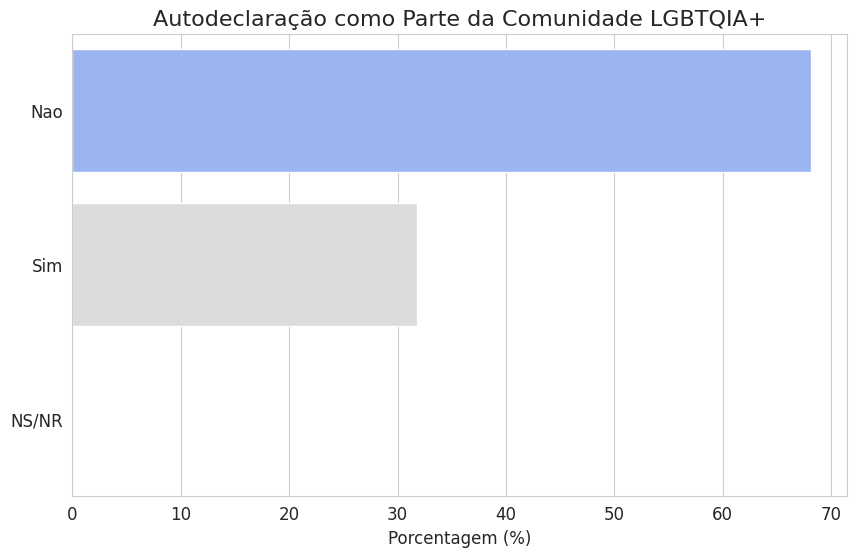

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Porcentagem (%)', y='Resposta', data=tabela_fazparte, orient='h', palette='coolwarm')
plt.title('Autodeclaração como Parte da Comunidade LGBTQIA+', fontsize=16)
plt.xlabel('Porcentagem (%)')
plt.ylabel('')
plt.show()